In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.datasets import load_boston

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
boston = load_boston()

In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
bos = pd.DataFrame(boston.data)

In [10]:
bos.columns = boston.feature_names

In [11]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [15]:
bos["PRICE"] = boston.target

In [16]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [17]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


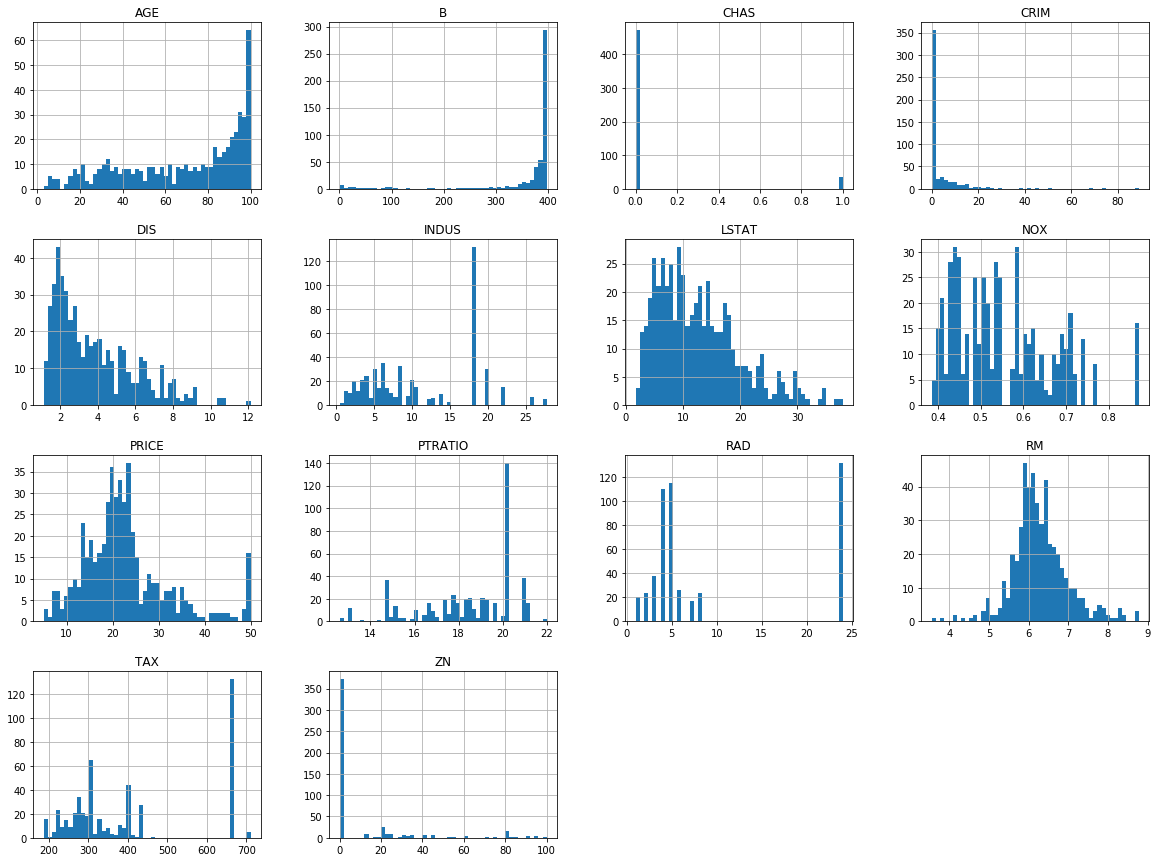

In [55]:
bos.hist(bins=50, figsize=(20,15))
plt.show()

In [57]:
bos.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


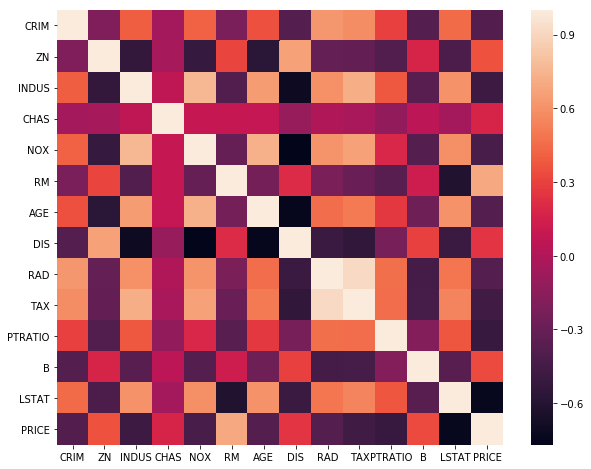

In [60]:
plt.figure(figsize=(10,8))
sns.heatmap(bos.corr())

In [18]:
X=bos.drop('PRICE', axis=1)
Y=bos['PRICE']

In [19]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state= 10)

In [20]:
print(train_x.shape)
print(train_y.shape)

(404, 13)
(404,)


In [21]:
print(test_x.shape)
print(test_y.shape)

(102, 13)
(102,)


In [27]:
import statsmodels.api as sm

In [28]:
X=X.drop(['B'],axis=1)

ValueError: labels ['B'] not contained in axis

In [80]:
mod = sm.OLS(Y,X)

In [81]:
res = mod.fit()

In [82]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     329.9
Date:                Fri, 13 Jul 2018   Prob (F-statistic):          1.12e-182
Time:                        19:12:30   Log-Likelihood:                -1895.9
No. Observations:                 506   AIC:                             3806.
Df Residuals:                     499   BIC:                             3835.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1811      0.071     -2.566      0.0

In [83]:
train_x = sm.add_constant(train_x)
test_x = sm.add_constant(test_x)
model = sm.OLS(train_y, train_x).fit()

In [84]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     90.07
Date:                Fri, 13 Jul 2018   Prob (F-statistic):          1.10e-108
Time:                        19:12:40   Log-Likelihood:                -1170.4
No. Observations:                 404   AIC:                             2369.
Df Residuals:                     390   BIC:                             2425.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.5887      5.429      6.740      0.000      25.916      47.262
CRIM          -0.1277      0.032     -4.010      0.000      -0.190      -0.065
ZN             0.0632      0.014      4.420      0.000       0.035       0.091
INDUS         -0.0071      0.063     -0.113      0.910      -0.132       0.118
CHAS           1.9762      0.923      2.140      0.033       0.161       3.792
NOX          -16.3187      3.965     -4.116      0.000     -24.114      -8.523
RM             3.1009      0.449      6.908      0.000       2.218       3.983
AGE            0.0164      0.015      1.130      0.259      -0.012       0.045
DIS           -1.4837      0.214     -6.923      0.000      -1.905      -1.062
RAD            0.3038      0.067      4.512      0.000       0.171       0.436
TAX           -0.0121      0.004     -3.207      0.001      -0.019      -0.005
PTRATIO       -0.8214      0.141     -5.834      0.000      -1.098      -0.545
B              0.0115      0.003      4.280      0.000       0.006       0.017
LSTAT         -0.5826      0.053    -11.041      0.000      -0.686      -0.479
==============================================================================
Omnibus:                      141.235   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              649.356
Skew:                           1.454   Prob(JB):                    9.87e-142
Kurtosis:                       8.488   Cond. No.                     1.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

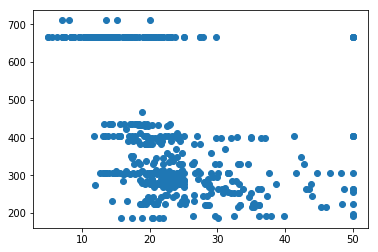

In [39]:
plt.scatter(Y,X.TAX)
plt.show()

In [71]:
X=X.drop(['AGE'],axis=1)

In [85]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["Features"] = X.columns
                    

In [86]:
vif.sort_values(by='VIF Factor')

,VIF Factor,Features
3,1.086441,CHAS
0,2.045880,CRIM
1,2.298857,ZN
4,3.962797,DIS
5,4.657758,RAD
6,6.717383,LSTAT
2,6.896594,INDUS


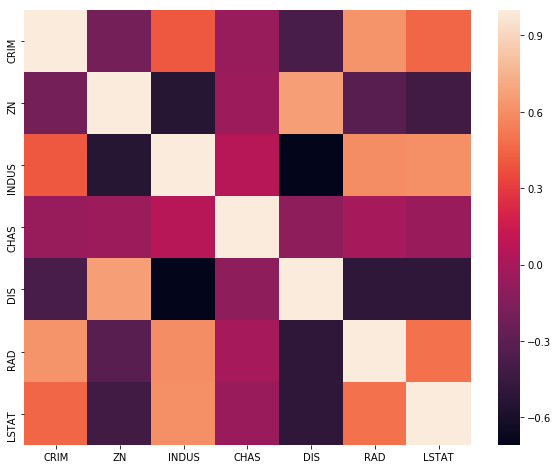

In [88]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr())

In [89]:
lm = LinearRegression()

In [90]:
model = lm.fit(train_x.values, train_y.values)

In [91]:
model.coef_

array([ 0.00000000e+00, -1.27690836e-01,  6.31863514e-02, -7.13417996e-03,
        1.97615559e+00, -1.63187396e+01,  3.10087272e+00,  1.63907309e-02,
       -1.48370066e+00,  3.03791769e-01, -1.20762369e-02, -8.21411613e-01,
        1.15198597e-02, -5.82565037e-01])

In [92]:
model.intercept_

36.588723036652496

In [93]:
model.score(train_x, train_y)

0.7501462670128084

In [94]:
model.score(test_x, test_y)

0.6706419566528637